<a href="https://colab.research.google.com/github/tgalkovskyi/noiseprint/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This can be executed in https://colab.research.google.com "Python 3 / GPU" runtime. Also works in CPU runtime but much slower.

In [3]:
!git clone https://github.com/grip-unina/noiseprint

Cloning into 'noiseprint'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 328 (delta 39), reused 19 (delta 9), pack-reused 261
Receiving objects: 100% (328/328), 158.53 MiB | 28.58 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Checking out files: 100% (194/194), done.


In [4]:
cd noiseprint/

/content/noiseprint


QF= 200
INFO:tensorflow:Restoring parameters from /content/noiseprint/noiseprint/./nets/net_jpg101/model
 1536x2048 large 101
other outliersNlogl: 42
other outliersProb: 0.6053393362090846
latency: 25.14


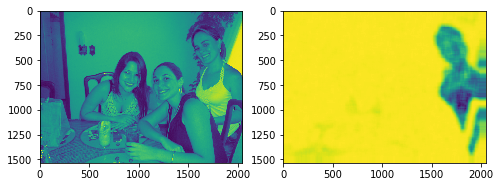

In [19]:
imgfilename = 'demo/imgs/splicing.png'  #@param {type:"string"} 

import io
import time
import skimage
from noiseprint import noiseprint_blind
from noiseprint.utility import utilityRead

with open(imgfilename, 'rb') as f:
  img = skimage.io.imread(f, as_gray=True)
  f.seek(0)
  try:
    QF = utilityRead.jpeg_qtableinv(f)
  except:
    QF = 200
  print('QF = %d' % QF)
    
latency = time.time()
mapp, valid, range0, range1, imgsize, other = noiseprint_blind.noiseprint_blind(img, QF, model_name='net')
latency = time.time() - latency

if mapp is None:
  print('Image is too small or too uniform')

print('other outliersNlogl: %s' % other['outliersNlogl'])
print('other outliersProb: %s' % other['outliersProb'])
print('latency: %0.2f' % latency)

from noiseprint.noiseprint_blind import genMappUint8
mapUint8 = genMappUint8(mapp, valid, range0, range1, imgsize)

from PIL import Image
pil_img = Image.fromarray(mapUint8)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(pil_img)
